In [48]:

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [49]:

plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('ggplot')


data = pd.read_csv("C:/Users/ASUS/Desktop/Trabalho_SIG/US/us-states-connecticut.csv", encoding='utf-8', skiprows=[1])


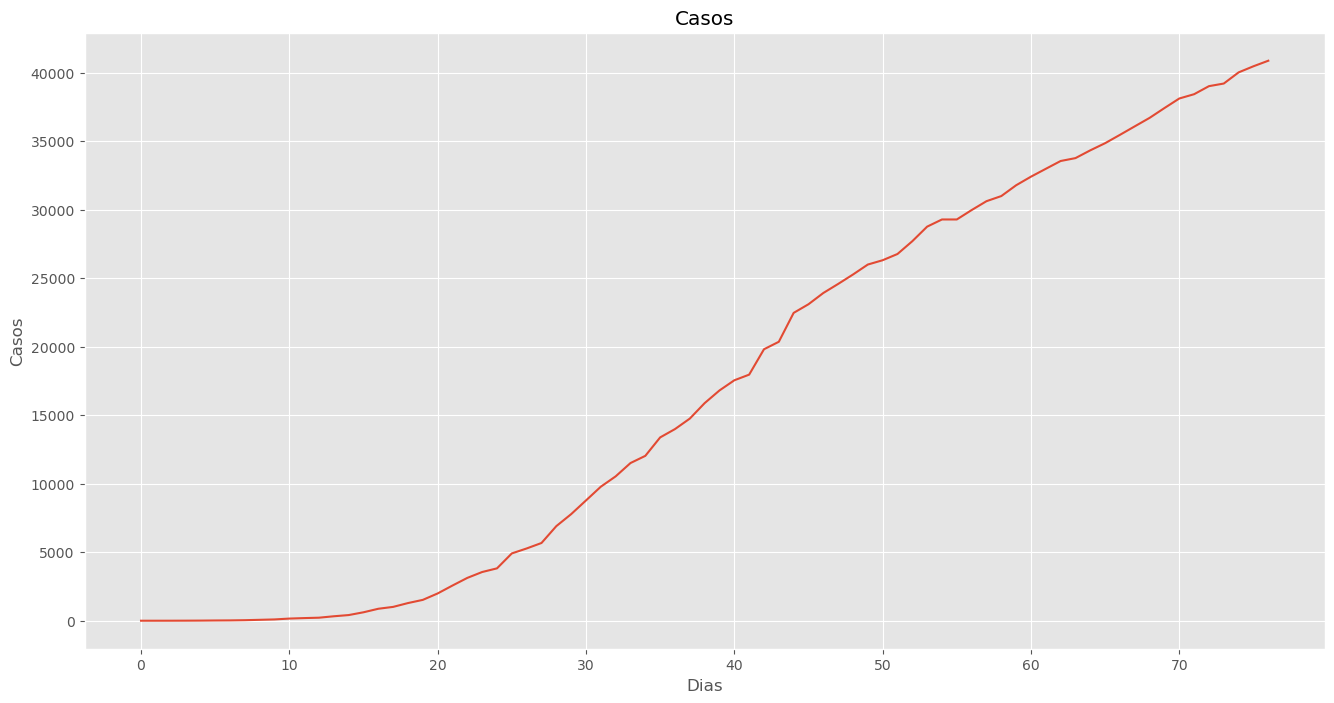

In [50]:
plt.figure(figsize=(16,8))
plt.title('Casos')
plt.xlabel('Dias')
plt.ylabel('Casos')
plt.plot(data['cases'])
plt.show()

In [51]:
data = data[['cases']]
data.head(4)

,cases
0,2
1,2
2,3
3,6


In [52]:
future_days = 35
data['Prediction'] = data[['cases']].shift(-future_days)
data.tail(4)

,cases,Prediction
73,39208,NaN
74,40022,NaN
75,40468,NaN
76,40873,NaN


In [53]:
x= np.array(data.drop(['Prediction'], 1))[:-future_days]
print(x)

[[    2]
 [    2]
 [    3]
 [    6]
 [   11]
 [   20]
 [   26]
 [   41]
 [   68]
 [   96]
 [  159]
 [  194]
 [  223]
 [  327]
 [  415]
 [  618]
 [  875]
 [ 1012]
 [ 1291]
 [ 1524]
 [ 1993]
 [ 2571]
 [ 3128]
 [ 3557]
 [ 3824]
 [ 4915]
 [ 5276]
 [ 5675]
 [ 6906]
 [ 7781]
 [ 8781]
 [ 9784]
 [10538]
 [11510]
 [12035]
 [13381]
 [13989]
 [14755]
 [15884]
 [16809]
 [17550]
 [17962]]


In [54]:
y = np.array(data['Prediction'])[:-future_days]
print(y)

[13381. 13989. 14755. 15884. 16809. 17550. 17962. 19815. 20360. 22469.
 23100. 23921. 24582. 25269. 25997. 26312. 26767. 27700. 28764. 29287.
 29287. 29973. 30621. 30995. 31784. 32411. 32984. 33554. 33765. 34333.
 34855. 35464. 36085. 36703. 37419. 38116. 38430. 39017. 39208. 40022.
 40468. 40873.]


In [55]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)

In [56]:
tree = DecisionTreeRegressor().fit(x_train,y_train)
lr = LinearRegression().fit(x_train, y_train)

In [57]:
x_future = data.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[   41],
       [   68],
       [   96],
       [  159],
       [  194],
       [  223],
       [  327],
       [  415],
       [  618],
       [  875],
       [ 1012],
       [ 1291],
       [ 1524],
       [ 1993],
       [ 2571],
       [ 3128],
       [ 3557],
       [ 3824],
       [ 4915],
       [ 5276],
       [ 5675],
       [ 6906],
       [ 7781],
       [ 8781],
       [ 9784],
       [10538],
       [11510],
       [12035],
       [13381],
       [13989],
       [14755],
       [15884],
       [16809],
       [17550],
       [17962]], dtype=int64)

In [58]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[17962. 20360. 20360. 23100. 23921. 23921. 25269. 25269. 26312. 27700.
 27700. 28764. 28764. 29287. 29973. 30621. 31784. 31784. 32411. 32984.
 33554. 33765. 34333. 34855. 35464. 36085. 36703. 37419. 37419. 39017.
 39017. 39208. 40022. 40022. 40022.]

[21942.30763947 21978.34226162 22015.71149941 22099.79228443
 22146.50383166 22185.20768509 22324.00771115 22441.45388706
 22712.38086102 23055.37707928 23238.21942132 23610.57718356
 23921.54262658 24547.47735952 25318.88519671 26062.26610556
 26634.81621309 26991.15858771 28447.22424579 28929.02049012
 29461.5321286  31104.44397562 32272.23265649 33606.84829176
 34945.46777394 35951.76796294 37249.01436042 37949.68756894
 39746.08021402 40557.52652027 41579.84209688 43086.62314911
 44321.14261174 45310.09279748 45859.95443921]


C:\OSGEO4~1\apps\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


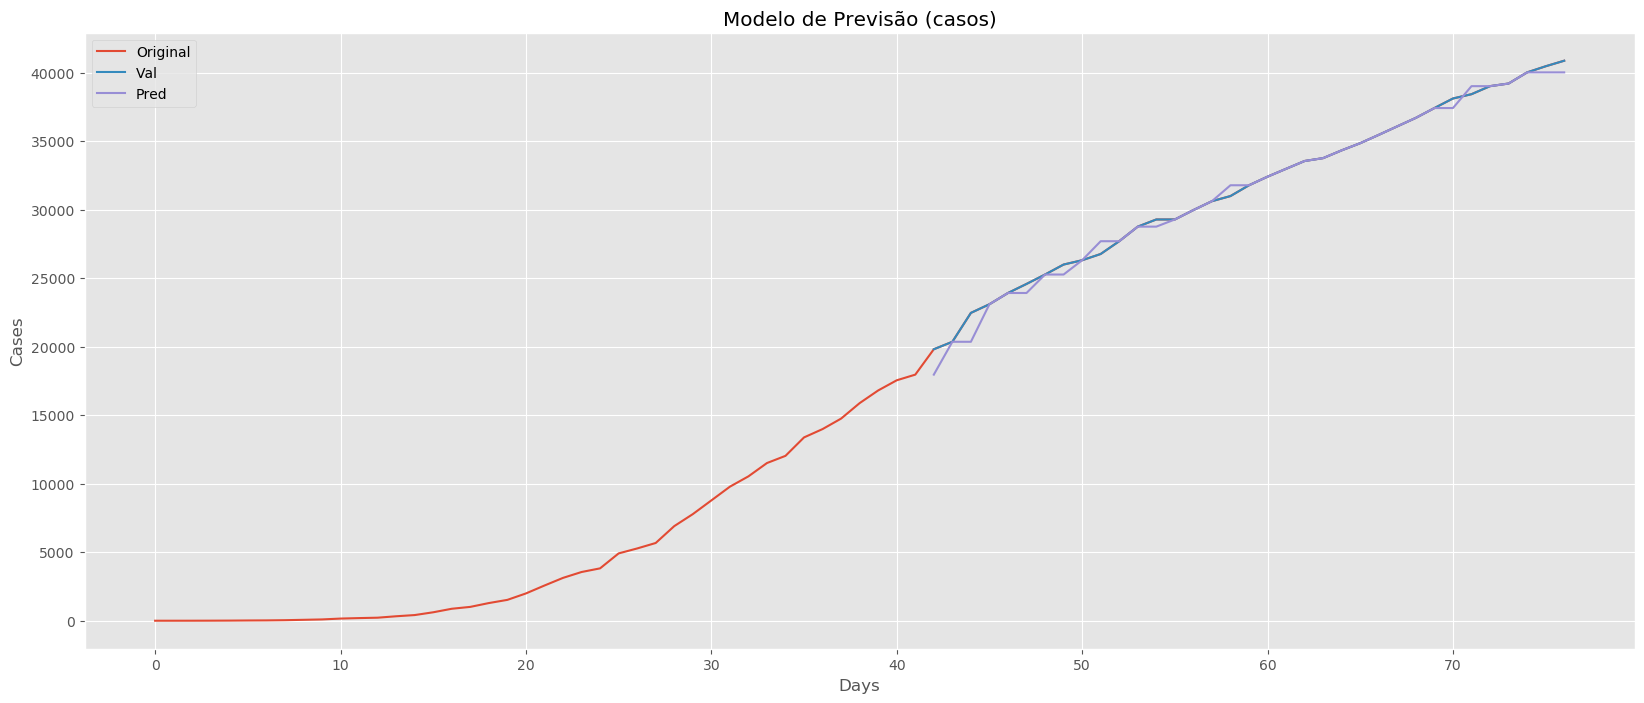

In [59]:
predictions = tree_prediction
valid = data[x.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(20,8))
plt.title('Modelo de Previsão (casos)')
plt.xlabel('Days')
plt.ylabel('Cases')
plt.plot(data['cases'])
plt.plot(valid[['cases', 'Predictions']])
plt.legend(['Original', 'Val', 'Pred'])
plt.savefig('Figuras/previsaocasos.jpg', bbox_inches='tight')
plt.show()
